# SPDA SUMMATIVE ASSESSMENT QUESTION 2


## Webscrapping Using Reddit API


The data was gotten from the Reddit website, under the r\health session.

The data consist of all the trending health topics being dicussed on the forum - r\health from 10/2/2024 - 11/15/2024.

This data is important to know the current health trends as it realtes to citizen joournalism. This data can inform writers and journalists on the key topics people are interested to know more about.

The variables of interst includes -  'title'- which represents the trending topics, 'num_comments' - the total comments per topic, 'score - ',, 'author - the initiator of the topica which in this case includes news oulets like nbc news, ctvnews etc'

Praw was installed using "pip install praw" to enable scrapping from the Reddit website. Praw is a Python wrapper for the Reddit API, which makes authentication and JSON parsing easy.

In [60]:
import praw

#Authentication
reddit = praw.Reddit(
    client_id="5Wv14SUqGs8ETZ8inzjcMg",
    client_secret="0zUUYuMLM2vBe2-XVIExAqochF5gQQ",
    user_agent="windows:my_app:1.0 (by /u/Life_Hat1137)",
    username="Life_Hat1137",  # Your Reddit username
    password="Ola07061193131"  # Your Reddit password
)

print("Authenticated as:", reddit.user.me())


Authenticated as: Life_Hat1137


#### Step 2 - Perform data preparation/cleaning

In [62]:
import praw
import pandas as pd
import arrow

#Submission data
health_submissions = []

#Submissions r/health
for submission in reddit.subreddit('health').hot(limit=500):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    d['author'] = submission.author.name if submission.author else None
    d['subreddit'] = submission.subreddit.display_name
    
    # Convert created_utc to clear date WITH arrow
    d['date'] = arrow.get(submission.created_utc).format('YYYY-MM-DD')
    
    health_submissions.append(d)

In [64]:
df = pd.DataFrame(health_submissions)

print(df.head())

df.to_csv('health_reddit_data_with_dates_arrow.csv', index=False)

        id                                              title  num_comments  \
0  1gtus84  RFK perpetuating obesity stigma and GLP-1 misi...            90   
1  1gtxmwp  RFK Jr’s vaccine views ‘dangerous’, cousin Car...             8   
2  1gu0rfz      Fact-checking RFK Jr's views on health policy            10   
3  1gtxa81  E. coli outbreak linked to organic carrots sic...             5   
4  1gtgfal  When muscles work out, they help neurons to gr...            14   

   score  upvote_ratio           domain  gilded  num_crossposts   nsfw  \
0    332          0.83          cnn.com       0               0  False   
1    157          0.90  theguardian.com       0               0  False   
2     28          0.89          bbc.com       0               0  False   
3     43          0.94          npr.org       0               0  False   
4    208          0.99     news.mit.edu       0               0  False   

                 author subreddit        date  
0  Mountain-Science4526    Healt

PermissionError: [Errno 13] Permission denied: 'health_reddit_data_with_dates_arrow.csv'

In [66]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 398
Number of columns: 12


In [68]:
health_reddit = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

In [70]:
health_reddit

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
0,1gt35fn,Texas follows Louisiana’s lead to reclassify r...,38,486,0.96,lailluminator.com,0,0,False,newzee1,Health,2024-11-17
1,1gtgfal,"When muscles work out, they help neurons to gr...",3,19,0.95,news.mit.edu,0,0,False,BlitzOrion,Health,2024-11-17
2,1gt68zo,H5N1 bird flu infects six more humans in Calif...,3,99,0.99,latimes.com,0,0,False,thinkB4WeSpeak,Health,2024-11-17
3,1gsv128,Nutritionist explains why you’re probably eati...,123,303,0.88,news.harvard.edu,0,2,False,Sariel007,Health,2024-11-16
4,1gsmvym,Vaccine shows promise against aggressive breas...,14,465,0.99,medicine.washu.edu,0,0,False,F0urLeafCl0ver,Health,2024-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1fwb5jk,Scientists may have found the reason why peopl...,6,55,0.93,statnews.com,0,0,False,TylerFortier_Photo,Health,2024-10-04
413,1fwkkcb,Bird Flu Fears Stoke the Race for an mRNA Flu ...,1,9,0.90,wired.com,0,0,False,F0urLeafCl0ver,Health,2024-10-05
414,1fwpipv,EU/EEA travellers advised to exercise caution ...,0,3,1.00,ecdc.europa.eu,0,0,False,boppinmule,Health,2024-10-05
415,1fvxrzl,Scientists in UK developing world's first ovar...,1,143,1.00,euronews.com,0,1,False,euronews-english,Health,2024-10-04


In [72]:
health_reddit.columns

Index(['id', 'title', 'num_comments', 'score', 'upvote_ratio', 'domain',
       'gilded', 'num_crossposts', 'nsfw', 'author', 'subreddit', 'date'],
      dtype='object')

In [74]:
schema_fname = 'health_reddit_data_with_dates_arrow.csv'
schema_raw = pd.read_csv(schema_fname, index_col='author').title

In [48]:
schema_raw

author
newzee1               Texas follows Louisiana’s lead to reclassify r...
BlitzOrion            When muscles work out, they help neurons to gr...
thinkB4WeSpeak        H5N1 bird flu infects six more humans in Calif...
Sariel007             Nutritionist explains why you’re probably eati...
F0urLeafCl0ver        Vaccine shows promise against aggressive breas...
                                            ...                        
TylerFortier_Photo    Scientists may have found the reason why peopl...
F0urLeafCl0ver        Bird Flu Fears Stoke the Race for an mRNA Flu ...
boppinmule            EU/EEA travellers advised to exercise caution ...
euronews-english      Scientists in UK developing world's first ovar...
nbcnews               Is bird flu spreading in people? Without blood...
Name: title, Length: 417, dtype: object

In [27]:
schema_raw['nbcnews']

author
nbcnews    CDC confirms Oregon’s first human case of bird...
nbcnews    Trump picks RFK Jr. , anti-vaccine activist, f...
nbcnews    FDA employees consider how to handle RFK Jr., ...
nbcnews    Sudden syphilis retreat in gay men is most lik...
nbcnews    Cutting-edge test uses DNA sequencing to yield...
nbcnews    Study maps how nonprofit religious groups set ...
nbcnews    After Trump win, RFK Jr. says he won't 'take a...
nbcnews    Abortion rights ballot measures pass in 7 stat...
nbcnews    Trump team fully embraces RFK Jr.'s vaccine sk...
nbcnews    CDC says slivered onions are likely cause of M...
nbcnews    What food safety experts steer clear of to avo...
nbcnews    Illnesses linked to McDonald's E. coli outbrea...
nbcnews    FDA eyes McDonald's supplier Taylor Farms as s...
nbcnews    McDonald's zeroes in on onions as the likely s...
nbcnews    E. coli outbreak linked to McDonald’s Quarter ...
nbcnews    Some Juul users are receiving thousands of dol...
nbcnews    Insura

In [29]:
health_reddit.describe(include= 'all')

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
count,417,417,417.000000,417.000000,417.000000,417,417.0,417.000000,417,417,417,417
unique,417,414,NaN,NaN,NaN,114,NaN,NaN,2,112,1,45
top,1gt35fn,Sleepy during the day? You may be at higher ri...,NaN,NaN,NaN,nbcnews.com,NaN,NaN,False,nbcnews,Health,2024-10-22
freq,1,2,NaN,NaN,NaN,30,NaN,NaN,416,26,417,18
mean,NaN,NaN,25.839329,175.865707,0.919544,NaN,0.0,0.167866,NaN,NaN,NaN,NaN
std,NaN,NaN,47.085189,222.785591,0.105812,NaN,0.0,0.433704,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.190000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,33.000000,0.900000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.000000,89.000000,0.950000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,30.000000,243.000000,0.980000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN


In [50]:
health_reddit.author.value_counts()

author
nbcnews                26
euronews-english       21
Maxcactus              19
nytopinion             18
CTVNEWS                18
                       ..
techreview              1
sorryDontUnderstand     1
Specific-Ad7048         1
Diazepam                1
Lighting                1
Name: count, Length: 112, dtype: int64

Ignore rows that the authors have just one title discussion each -
indig0sixalpha, sullie363, Sothern_Opposit747, shinybrighyhings, LosFelizCB.

health_reddit.sample(10)


#### Missing data

The data showed no missing values.

In [52]:
#Missing values
print(df.isnull().sum()) 

id                0
title             0
num_comments      0
score             0
upvote_ratio      0
domain            0
gilded            0
num_crossposts    0
nsfw              0
author            0
subreddit         0
date              0
dtype: int64


Remove unwanted columns

In [76]:
# Remove unwanted columns
columns_to_drop = ['nsfw', 'gilded', 'num_crossposts', 'domain', 'upvote_ratio']  # Example columns to drop
health_reddit.drop(columns=columns_to_drop, inplace=True)

# Verify the columns after removal
print(health_reddit.columns)

Index(['id', 'title', 'num_comments', 'score', 'author', 'subreddit', 'date'], dtype='object')


In [78]:
# Drop rows with missing values in any column
health_reddit.dropna(inplace=True)

# If you only want to drop rows where specific columns have missing values:
# data.dropna(subset=['column_name'], inplace=True)

# Verify missing values
print(health_reddit.isnull().sum())

id              0
title           0
num_comments    0
score           0
author          0
subreddit       0
date            0
dtype: int64


In [ ]:
Remove duplicates

In [100]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and apply lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the cleaning function to the text columns
health_reddit['clean_title'] = health_reddit['title'].apply(clean_text)
health_reddit['clean_author'] = health_reddit['author'].apply(clean_text)

# View the cleaned columns
print(health_reddit[['clean_title', 'clean_author']].head())

                                         clean_title   clean_author
0  texas follows louisiana lead reclassify reprod...         newzee
1        muscle work help neuron grow new study show     blitzorion
2    hn bird flu infects six human california oregon  thinkbwespeak
3  nutritionist explains youre probably eating wa...         sariel
4      vaccine show promise aggressive breast cancer   furleafclver


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
health_reddit

,id,title,num_comments,score,author,subreddit,date,clean_title,clean_author,clean_id
0,1gt35fn,Texas follows Louisiana’s lead to reclassify r...,38,486,newzee1,Health,2024-11-17,texas follows louisiana lead reclassify reprod...,newzee,texas follows louisiana lead reclassify reprod...
1,1gtgfal,"When muscles work out, they help neurons to gr...",3,19,BlitzOrion,Health,2024-11-17,muscle work help neuron grow new study show,blitzorion,muscle work help neuron grow new study show bl...
2,1gt68zo,H5N1 bird flu infects six more humans in Calif...,3,99,thinkB4WeSpeak,Health,2024-11-17,hn bird flu infects six human california oregon,thinkbwespeak,hn bird flu infects six human california orego...
3,1gsv128,Nutritionist explains why you’re probably eati...,123,303,Sariel007,Health,2024-11-16,nutritionist explains youre probably eating wa...,sariel,nutritionist explains youre probably eating wa...
4,1gsmvym,Vaccine shows promise against aggressive breas...,14,465,F0urLeafCl0ver,Health,2024-11-16,vaccine show promise aggressive breast cancer,furleafclver,vaccine show promise aggressive breast cancer ...
...,...,...,...,...,...,...,...,...,...,...
412,1fwb5jk,Scientists may have found the reason why peopl...,6,55,TylerFortier_Photo,Health,2024-10-04,scientist may found reason people schizophreni...,tylerfortierphoto,scientist may found reason people schizophreni...
413,1fwkkcb,Bird Flu Fears Stoke the Race for an mRNA Flu ...,1,9,F0urLeafCl0ver,Health,2024-10-05,bird flu fear stoke race mrna flu vaccine,furleafclver,bird flu fear stoke race mrna flu vaccine furl...
414,1fwpipv,EU/EEA travellers advised to exercise caution ...,0,3,boppinmule,Health,2024-10-05,eueea traveller advised exercise caution visit...,boppinmule,eueea traveller advised exercise caution visit...
415,1fvxrzl,Scientists in UK developing world's first ovar...,1,143,euronews-english,Health,2024-10-04,scientist uk developing world first ovarian ca...,euronewsenglish,scientist uk developing world first ovarian ca...


In [104]:
cleaned_data = health_reddit[['id', 'num_comments','score','clean_author','date', 'clean_title']].copy()

In [124]:
cleaned_data.to_csv('cleaned_health_reddit_data.csv', index=False)

In [130]:
clean_data = pd.read_csv('cleaned_health_reddit_data.csv')

In [132]:
clean_data

,id,num_comments,score,clean_author,date,clean_title
0,1gt35fn,38,486,newzee,2024-11-17,texas follows louisiana lead reclassify reprod...
1,1gtgfal,3,19,blitzorion,2024-11-17,muscle work help neuron grow new study show
2,1gt68zo,3,99,thinkbwespeak,2024-11-17,hn bird flu infects six human california oregon
3,1gsv128,123,303,sariel,2024-11-16,nutritionist explains youre probably eating wa...
4,1gsmvym,14,465,furleafclver,2024-11-16,vaccine show promise aggressive breast cancer
...,...,...,...,...,...,...
412,1fwb5jk,6,55,tylerfortierphoto,2024-10-04,scientist may found reason people schizophreni...
413,1fwkkcb,1,9,furleafclver,2024-10-05,bird flu fear stoke race mrna flu vaccine
414,1fwpipv,0,3,boppinmule,2024-10-05,eueea traveller advised exercise caution visit...
415,1fvxrzl,1,143,euronewsenglish,2024-10-04,scientist uk developing world first ovarian ca...


#### Checking for outliers

The result below shows no presence of outliers

(0.0, 10000.0)

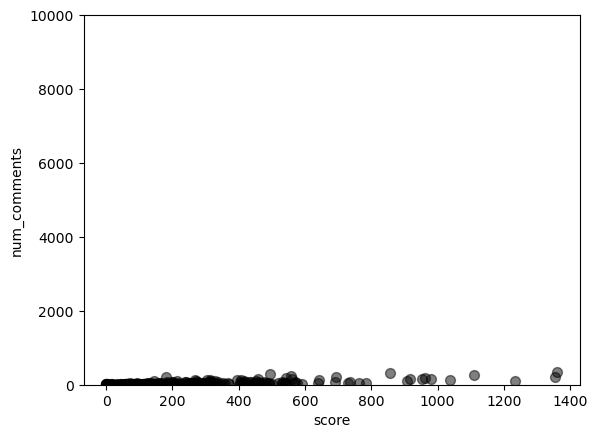

In [40]:
ax=health_reddit.plot.scatter(x='score', y='num_comments',s=50,c='k',alpha=.5)
ax.set_ylim((0, 170000))
ax.set_ylim((0,10000))

##### Additional steps

Adding a percentage to the comment and scores

#### Explanation
Steps to prepare data:
Steps to clean data:
Steps in creating additional columns:

### Step 3 - Exploratory Data analysis


In [ ]:
Calculating the sum of num_comments, score, num_crossposts, upvote_ratio

In [42]:
import pandas as pd

df = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

total_sum = df['num_comments'].sum()
print("Sum of num_comments is", total_sum)

total_counts = df['score'].sum()
print("Sum of score is", total_counts)


Sum of num_comments is 10775
Sum of score is 73336


In [ ]:
Calculating the means of num_comments, score, num_crossposts, upvote_ratio

In [44]:
data = pd.read_csv('health_reddit_data_with_dates_arrow.csv')
mean_comments = data['num_comments'].mean()
print("Mean num_comments is", mean_comments)

mean_score = data['score'].mean()
print("Mean score is", mean_score)

mean_crossposts = data['num_crossposts'].mean()
print("Mean num_crossposts is", mean_crossposts)

upvote_ratio = data['upvote_ratio'].mean()
print("Mean upvote_ratio is", upvote_ratio)

Mean num_comments is 25.839328537170264
Mean score is 175.86570743405275
Mean num_crossposts is 0.16786570743405277
Mean upvote_ratio is 0.9195443645083933


In [85]:
Calculating the range of num_comments, score, num_crossposts, upvote_ratio

In [46]:
range_comments = data['num_comments'].max() - data['num_comments'].min()
print("Range num_comments is", range_comments)

range_score = data['score'].max() - data['score'].min()
print("Range score is", range_score)

range_crossposts = data['num_crossposts'].max() - data['num_crossposts'].min()
print("Range num_crossposts is", range_crossposts)

range_upvote_ratio = data['upvote_ratio'].max() - data['upvote_ratio'].min()
print("Range upvote_ratio is",range_upvote_ratio)

Range num_comments is 346
Range score is 1361
Range num_crossposts is 3
Range upvote_ratio is 0.81


In [11]:
standard_deviation_comments = data["num_comments"].std()
print(standard_deviation_comments)

standard_deviation_score = data["score"].std()
print(standard_deviation_score)

standard_deviation_num_crossposts = data['num_crossposts'].std()
print(standard_deviation_num_crossposts)

standard_deviation_upvote_ratio = data['upvote_ratio'].std()
print(standard_deviation_score)

47.50261260507008
228.31327445541692
0.42199925429326895
228.31327445541692


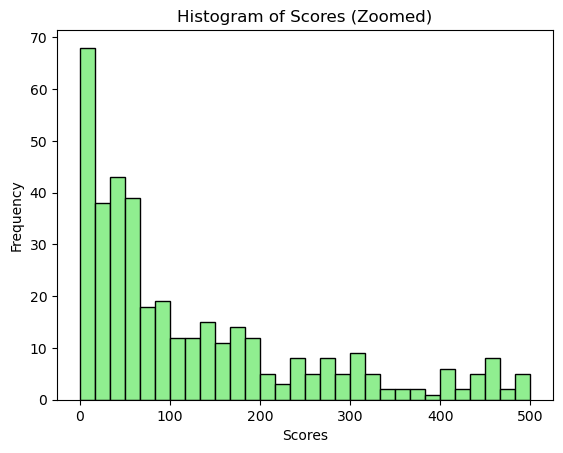

In [301]:
plt.hist(clean_data['score'], bins=30, range=(0, 500), color='lightgreen', edgecolor='black')
plt.title('Histogram of Scores (Zoomed)')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()


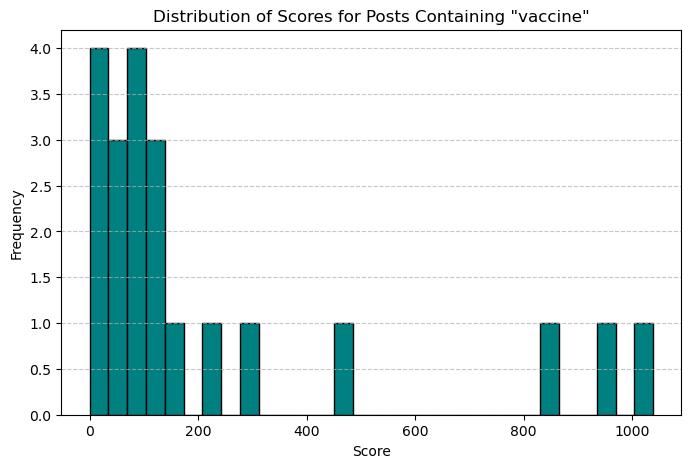

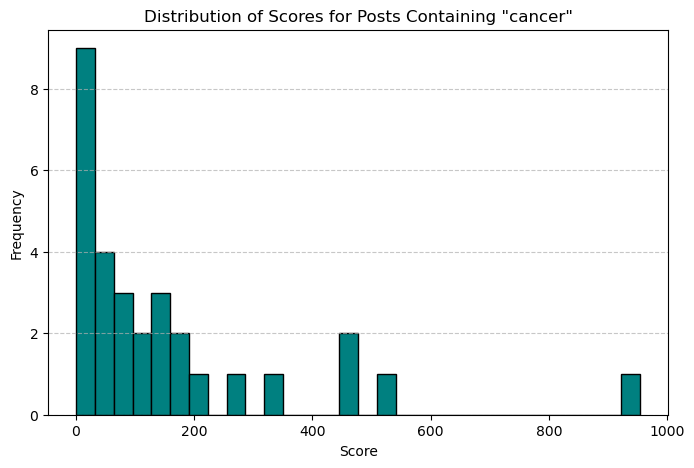

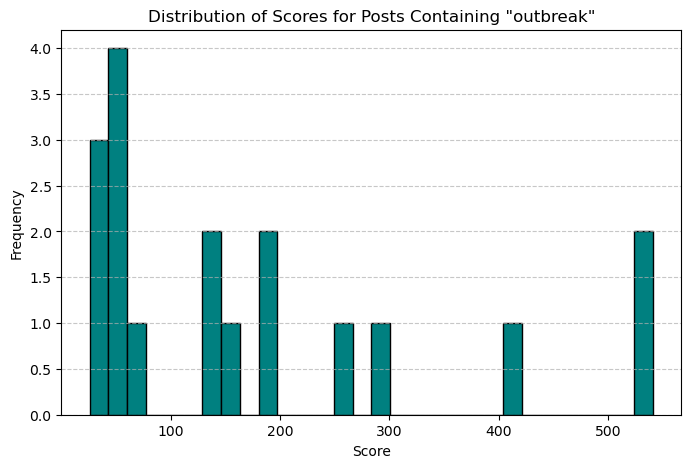

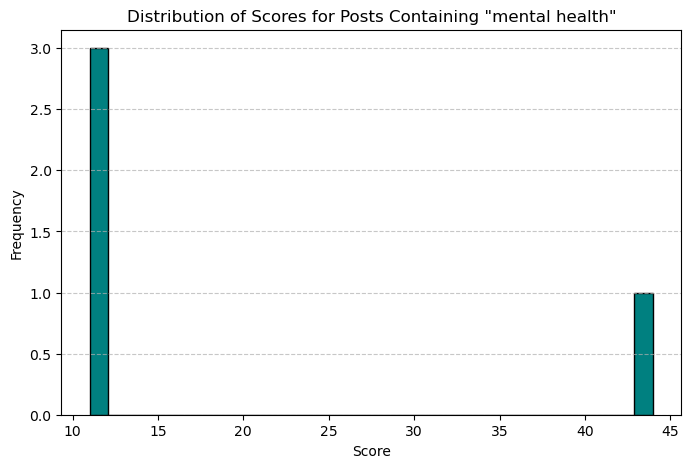

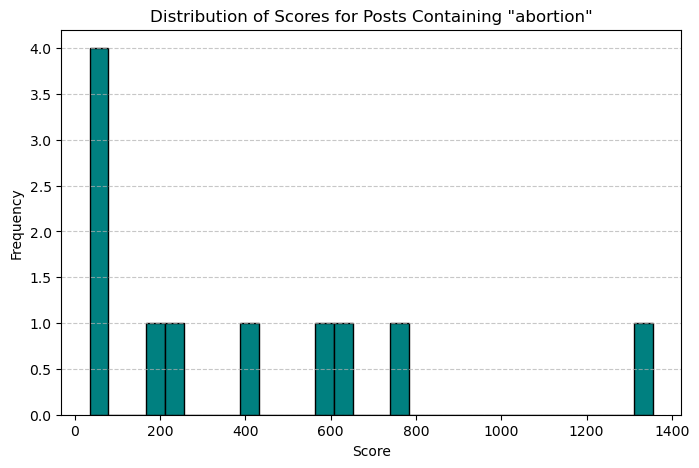

In [315]:
keywords = ['vaccine', 'cancer', 'outbreak', 'mental health', 'abortion']

for keyword in keywords:
    keyword_data =clean_data[clean_data['clean_title'].str.contains(keyword, case=False, na=False)]
    plt.figure(figsize=(8, 5))
    plt.hist(keyword_data['score'], bins=30, color='teal', edgecolor='black')
    plt.title(f'Distribution of Scores for Posts Containing "{keyword}"')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

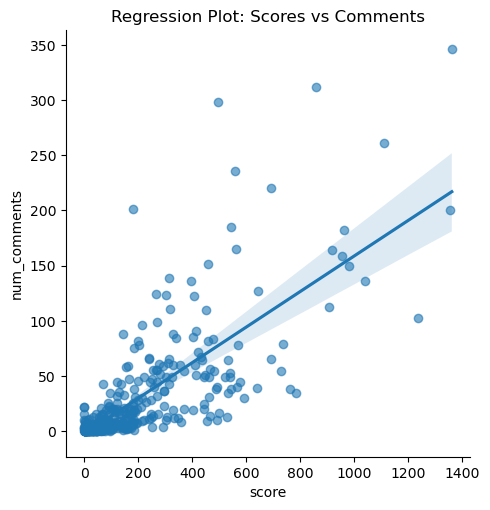

In [307]:
import seaborn as sns
sns.lmplot(x='score', y='num_comments', data=clean_data, scatter_kws={'alpha': 0.6})
plt.title('Regression Plot: Scores vs Comments')
plt.show()


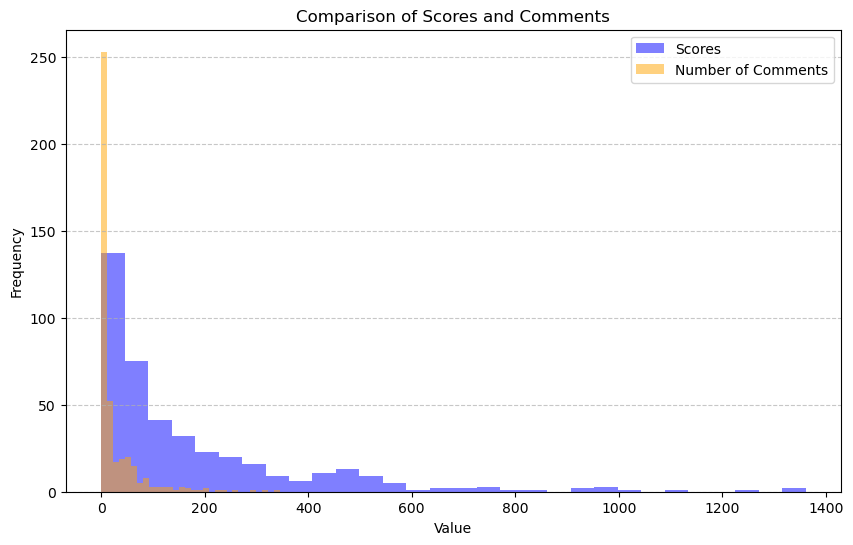

In [317]:
plt.figure(figsize=(10, 6))
plt.hist(clean_data['score'], bins=30, alpha=0.5, label='Scores', color='blue')
plt.hist(clean_data['num_comments'], bins=30, alpha=0.5, label='Number of Comments', color='orange')
plt.title('Comparison of Scores and Comments')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

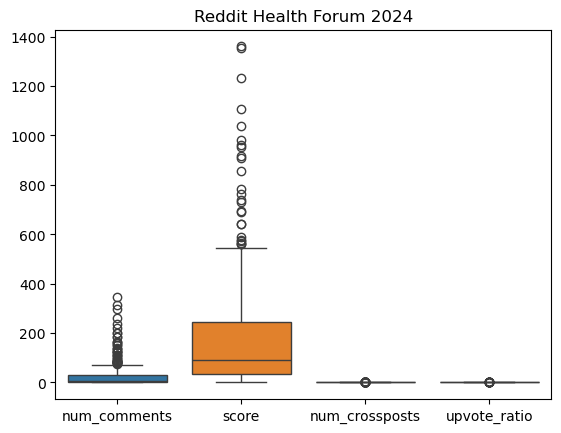

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=data[['num_comments', 'score', 'num_crossposts', 'upvote_ratio']])
plt.title('Reddit Health Forum 2024')
plt.show


In [193]:
# Load data (only relevant columns)
clean = pd.read_csv('cleaned_health_reddit_data.csv', usecols=['clean_title'])

# Display the first few rows
print(clean.head())

clean['clean_title'] = clean['clean_title'].fillna('')


                                         clean_title
0  texas follows louisiana lead reclassify reprod...
1        muscle work help neuron grow new study show
2    hn bird flu infects six human california oregon
3  nutritionist explains youre probably eating wa...
4      vaccine show promise aggressive breast cancer


In [234]:
from collections import Counter

all_words = ' '.join(clean['clean_title']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))


[('health', 55), ('study', 39), ('new', 38), ('say', 31), ('cancer', 29), ('u', 28), ('drug', 25), ('flu', 25), ('risk', 24), ('find', 23)]


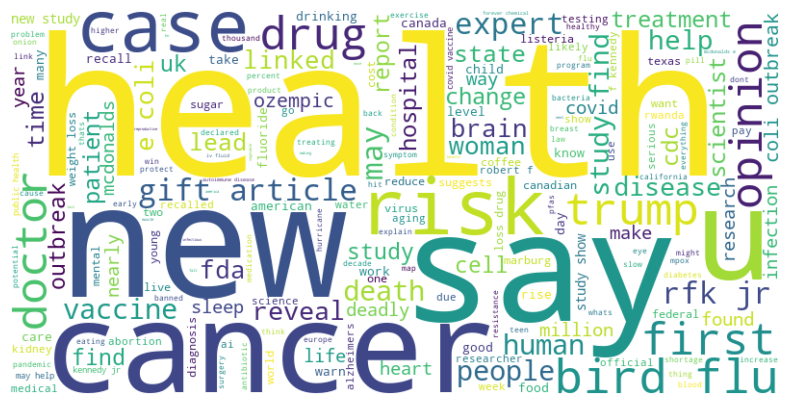

In [236]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [230]:
# Initialize the vectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

# Fit and transform the combined text
dtm = vectorizer.fit_transform(clean['clean_title'])

# Output the size of the matrix
print(f"Document-Term Matrix shape: {dtm.shape}")


Document-Term Matrix shape: (417, 515)


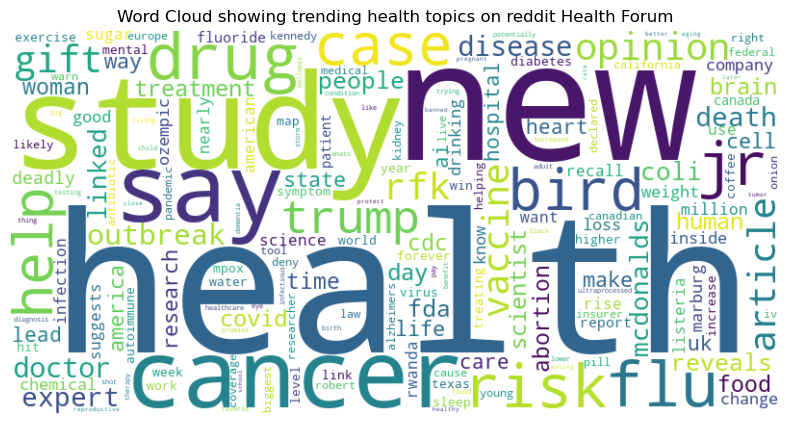

In [224]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `lda.components_` is available, and `vectorizer` is already defined

# Combine all words from all topics to generate a wordcloud for the entire dataset
word_count_dict = {}

# Aggregate word counts for all topics
for topic in lda.components_:
    for i in topic.argsort()[-50:]:  # Get the top 50 words per topic
        word = vectorizer.get_feature_names_out()[i]
        count = topic[i]
        if word in word_count_dict:
            word_count_dict[word] += count  # Accumulate counts
        else:
            word_count_dict[word] = count

# Generate word cloud from the aggregated word counts
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud showing trending health topics on reddit Health Forum')
plt.show()

In [ ]:
Top authors by number of posts

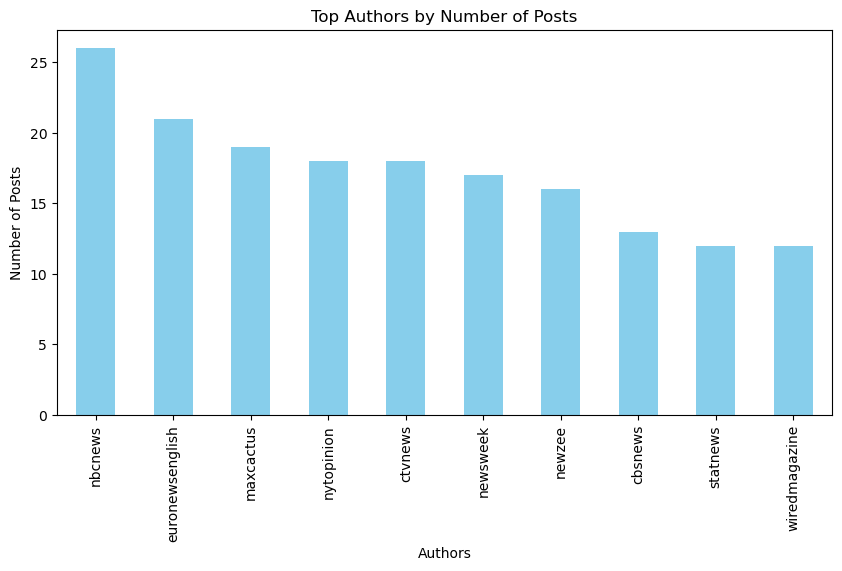

In [240]:
top_authors = clean_data['clean_author'].value_counts().head(10)  # Top 10 authors
top_authors.plot(kind='bar', figsize=(10, 5), title='Top Authors by Number of Posts', color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.show()


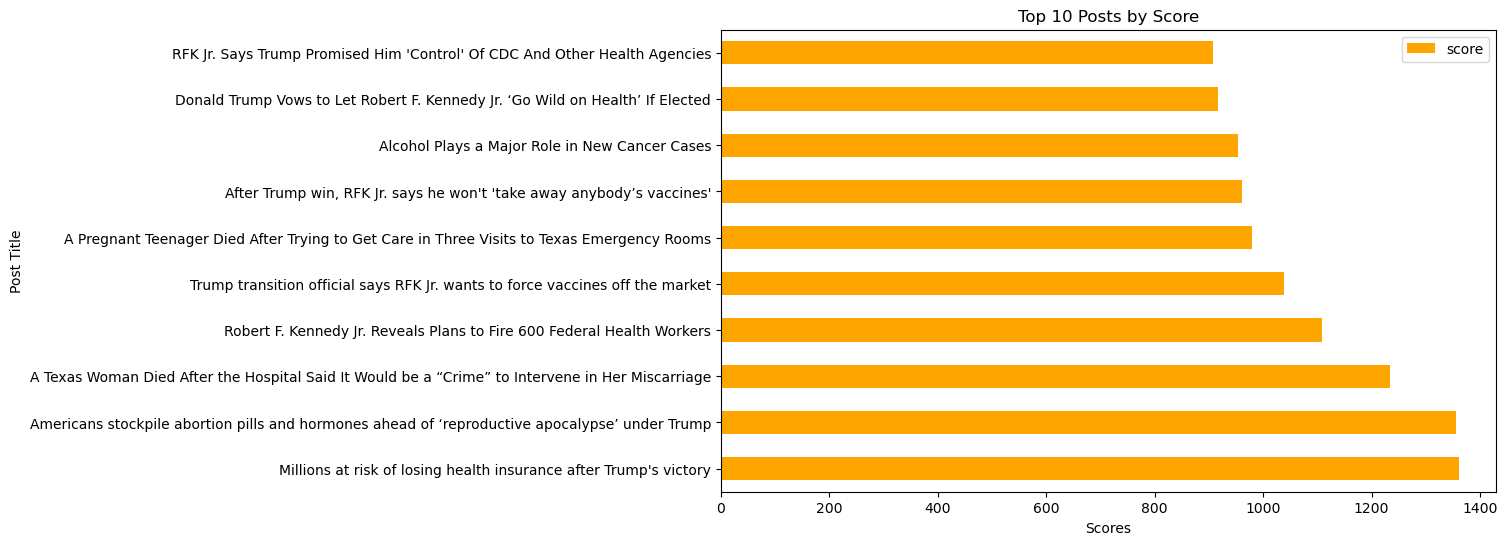

In [252]:
top_posts = health_reddit.nlargest(10, 'score')
top_posts.plot(x='title', y='score', kind='barh', figsize=(10, 6), title='Top 10 Posts by Score', color='orange')
plt.xlabel('Scores')
plt.ylabel('Post Title')
plt.show()


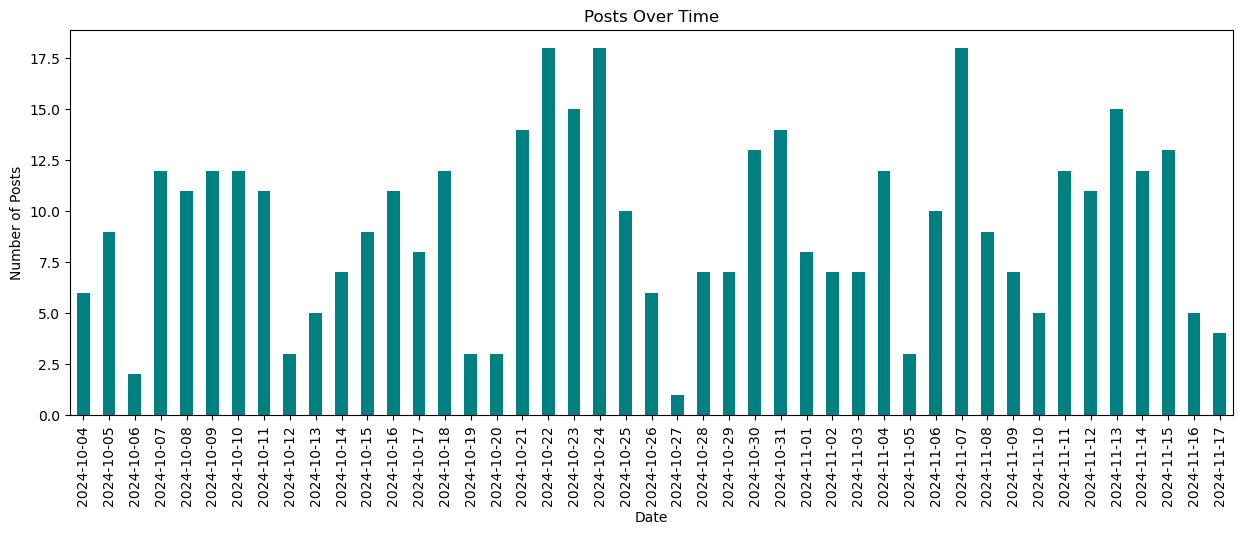

In [254]:
clean_data['date'] = pd.to_datetime(clean_data['date'])  # Ensure date is in datetime format
posts_per_day = clean_data.groupby(clean_data['date'].dt.date).size()
posts_per_day.plot(kind='bar', figsize=(15, 5), title='Posts Over Time', color='teal')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


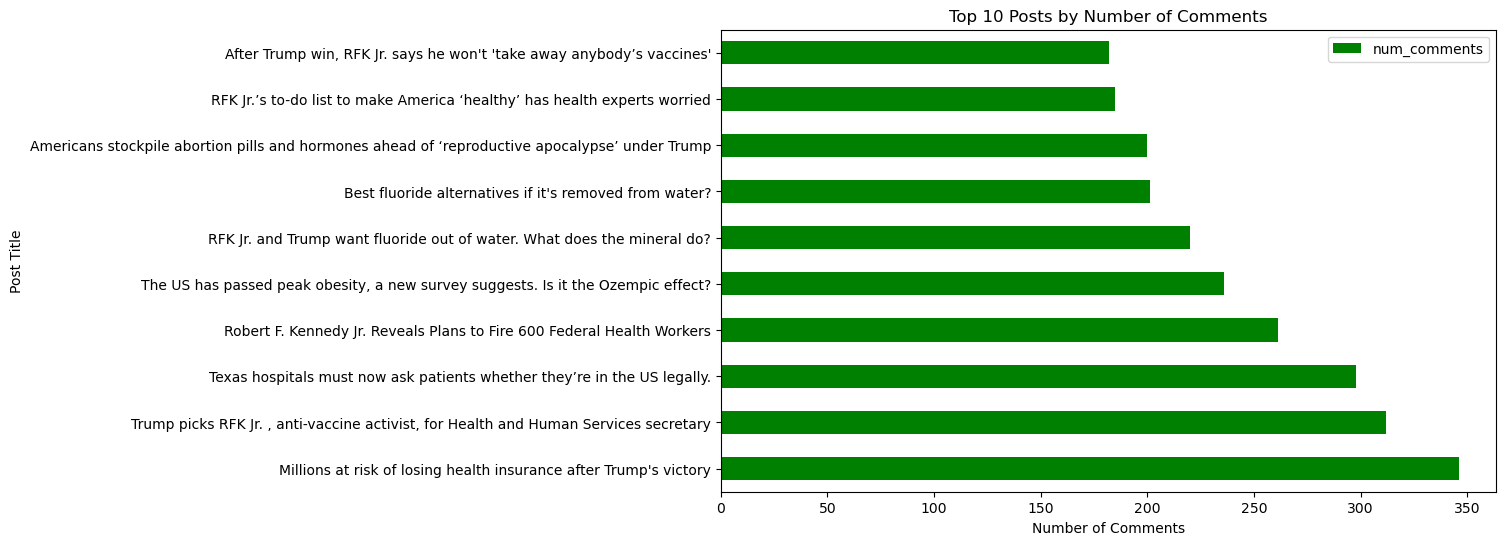

In [262]:
top_comments = health_reddit.nlargest(10, 'num_comments')
top_comments.plot(x='title', y='num_comments', kind='barh', figsize=(10, 6), title='Top 10 Posts by Number of Comments', color='green')
plt.xlabel('Number of Comments')
plt.ylabel('Post Title')
plt.show()


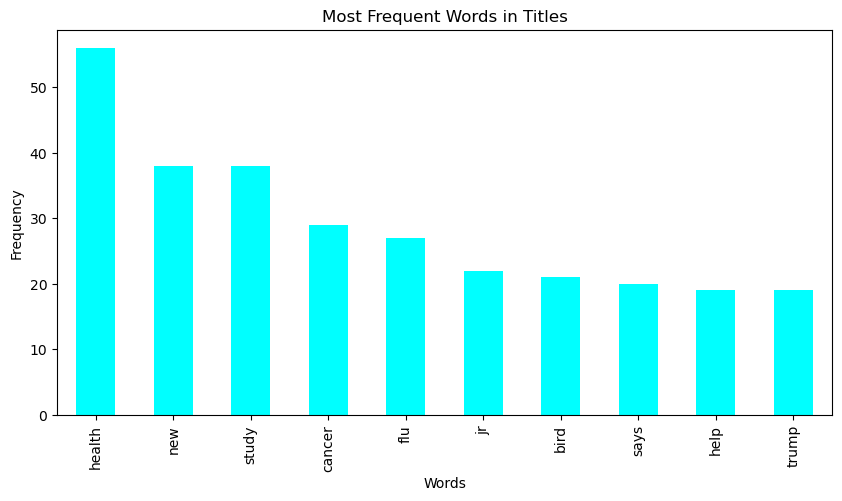

In [264]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(health_reddit['title'])
words = vectorizer.get_feature_names_out()
counts = word_counts.toarray().sum(axis=0)

pd.Series(counts, index=words).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Most Frequent Words in Titles', color='cyan')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


            Avg Score  Avg Comments
vaccine    231.714286     36.428571
cancer     159.600000     13.333333
bird flu    89.333333      8.142857
treatment   84.100000      3.100000
study      188.307692     25.461538


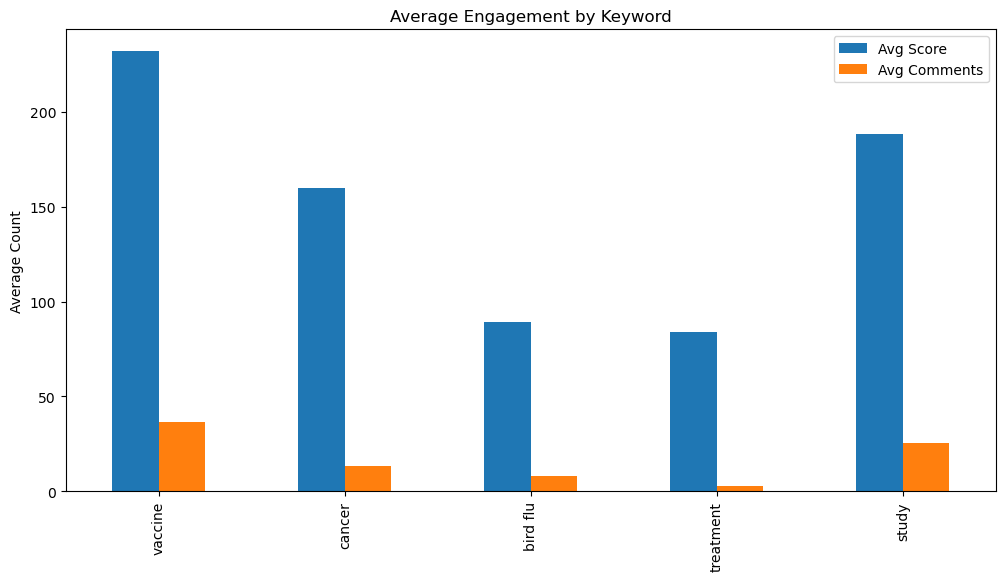

In [287]:
# Calculate average scores and comments by keyword
engagement = {}
for keyword in keywords:
    keyword_posts = clean_data[clean_data['clean_title'].str.contains(keyword, case=False, na=False)]
    avg_score = keyword_posts['score'].mean()
    avg_comments = keyword_posts['num_comments'].mean()
    engagement[keyword] = {'Avg Score': avg_score, 'Avg Comments': avg_comments}

# Convert engagement to a DataFrame
engagement_df = pd.DataFrame(engagement).T

print(engagement_df)

# Visualize engagement
engagement_df.plot(kind='bar', figsize=(12, 6), title='Average Engagement by Keyword')
plt.ylabel('Average Count')
plt.show()


In [ ]:
Keyword trend over time

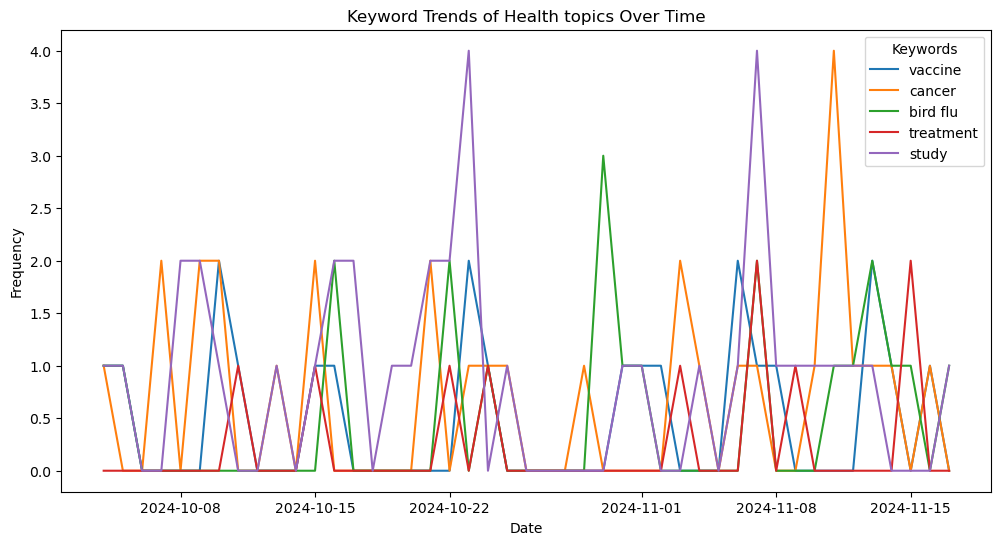

In [285]:
# Define keywords to track
keywords = ['vaccine', 'cancer', 'bird flu', 'treatment', 'study']

# Create a DataFrame to store counts over time
keyword_trends = pd.DataFrame()

for keyword in keywords:
    keyword_trends[keyword] = clean_data['clean_title'].str.contains(keyword, case=False, na=False).groupby(clean_data['date'].dt.date).sum()

# Plot keyword trends
keyword_trends.plot(figsize=(12, 6), title='Keyword Trends of Health topics Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Keywords')
plt.show()



#### Additional step

###### Adding an index to the data set

In [161]:
standard_deviation_comments = data["num_comments"].std()
print(standard_deviation_comments)

standard_deviation_score = data["score"].std()
print(standard_deviation_score)

standard_deviation_num_crossposts = data['num_crossposts'].std()
print(standard_deviation_num_crossposts)

standard_deviation_upvote_ratio = data['upvote_ratio'].std()
print(standard_deviation_score)

46.52290873104731
228.03539160198306
0.42199925429326895
228.03539160198306
